In [2]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("gagneurlab/SpeciesLM", revision = "downstream_species_lm")
model = AutoModelForMaskedLM.from_pretrained("gagneurlab/SpeciesLM", revision = "downstream_species_lm")

In [3]:
import sys 
import os
sys.path.append(os.path.abspath("../src"))

from dna_data import build_dna_dataloader
import numpy as np
import torch
from typing import cast
from omegaconf import OmegaConf as om
from omegaconf import DictConfig

yaml_path = "../yamls/pretrain/micro_dna_monarch-mixer-pretrain-786dim-80m-parameters.yaml"

with open(yaml_path) as f:
    cfg = om.load(f)
cfg = cast(DictConfig, cfg)

loaderCfg = cfg.train_loader
dataloader = build_dna_dataloader(loaderCfg, 1)

sample = next(iter(dataloader))
i = sample['input_ids']
output = model(i)

==Using the correct data collator


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `_

IT IS A MLMIT IS A MLM

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


IT IS A MLM
IT IS A MLM

IT IS A MLMIT IS A MLM

IT IS A MLM

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.



IT IS A MLM

IT IS A MLMIT IS A MLMIT IS A MLM

IT IS A MLM

IT IS A MLMIT IS A MLMIT IS A MLM


IT IS A MLM


tensor(131)


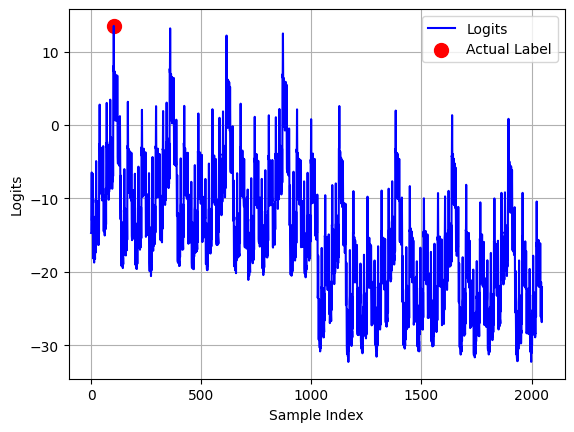

In [9]:
import matplotlib.pyplot as plt
def vis_logits(index, outputs):
    logits = outputs.logits[:,index,:2048].cpu().detach().numpy()[0]
    actual_label = sample['labels'][0][index].cpu().detach().numpy()

    # Plot the logits
    #plt.figure(figsize=(8, 6))
    plt.plot(range(len(logits)), logits, label='Logits', color='blue')
    #plt.bar(range(len(logits)), logits)
    # Mark the actual label
    plt.scatter(actual_label, logits[actual_label], color='red', label='Actual Label', s=100)

    # Add labels and title
    plt.xlabel('Sample Index')
    plt.ylabel('Logits')
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

def plot_ith_masked_token_dist(i: int, sample, outputs):
    ith = (sample['labels'][0] != -100).nonzero(as_tuple=True)[0][i]
    print(ith)
    vis_logits(ith, outputs)
    
plot_ith_masked_token_dist(10, sample, output)